# <center> Обучение с учителем. Классификация. Практика

## <center> Прогнозирование оттока клиентов банка


## Постановка задачи

Теперь настало время самостоятельной работы. В рамках самостоятельной работы вам предстоит решить задачу прогнозирования оттока клиентов банка.

> **Примечание.** Вы уже знакомились с этой задачей в модуле по визуализации («PYTHON-13. Визуализация данных») и провели небольшое исследование данных. Вы можете использовать результаты своего исследования для построения модели машинного обучения.

Напомним контекст задачи:

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время.

Итак, ранее вы провели небольшой разведывательный анализ, познакомились с данными и выявили, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. Вы отлично справились с первой задачей, и теперь представители банка предлагают вам построить саму модель машинного обучения, которая будет прогнозировать отток клиентов.

**Ваша задача** - построить классификатор, который позволит своевременно определять уходящих клиентов банка, оценить качество построенных моделей и проинтерпретировать результаты.

Разделим эту задачу на две части:
* В первой части мы подготовим данные для моделирования и построим простейшую модель логистической регрессии, оценим её качество и проанализируем результаты её работы.

* Во второй части мы займёмся построением моделей дерева решений и случайного леса, сравним их результаты с результатами, полученными на первом этапе, и сделаем финальный вывод.


Значения столбцов таблицы:

* RowNumber — номер строки таблицы;
* CustomerId — идентификатор клиента;
* Surname — фамилия клиента;
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
* Geography — страна проживания клиента (банк межнациональный);
* Gender — пол клиента;
* Age — возраст клиента;
* Tenure — сколько лет клиент пользуется банком;
* Balance — сколько у клиента денег на счетах в банке;
* NumOfProduct — число услуг банка, которыми воспользовался клиент;
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
* IsActiveMember — есть ли у клиента статус «активный клиент» (1 — да, 0 — нет);
* EstimatedSalary — предполагаемая заработная плата клиента;
* Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

Для начала импортируем библиотеки, которые нам понадобятся:

In [36]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка данных
%matplotlib inline

Итак, прочитаем нашу таблицу:

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
path = '/content/drive/MyDrive/2. SkillFactory/Machine Learning/ML-3. Обучение с учителем: классификация/ДЗ/churn.csv'.replace('\t', ' ')

In [39]:
churn_data = pd.read_csv(path)
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Практика: логистическая регрессия

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9:

### Задание 5.0 (не оценивается)

Для полноты задачи проведите небольшой разведывательный анализ данных. Постройте графики распределения целевого признака, диаграммы и графики, показывающие взаимосвязь между исходными признаками и целевым признаком, а также другие диаграммы, иллюстрирующие предоставленные данные.

**Совет:** воспользуйтесь кодом, который вы писали, выполняя задания в модуле «PYTHON-13. Визуализация данных».

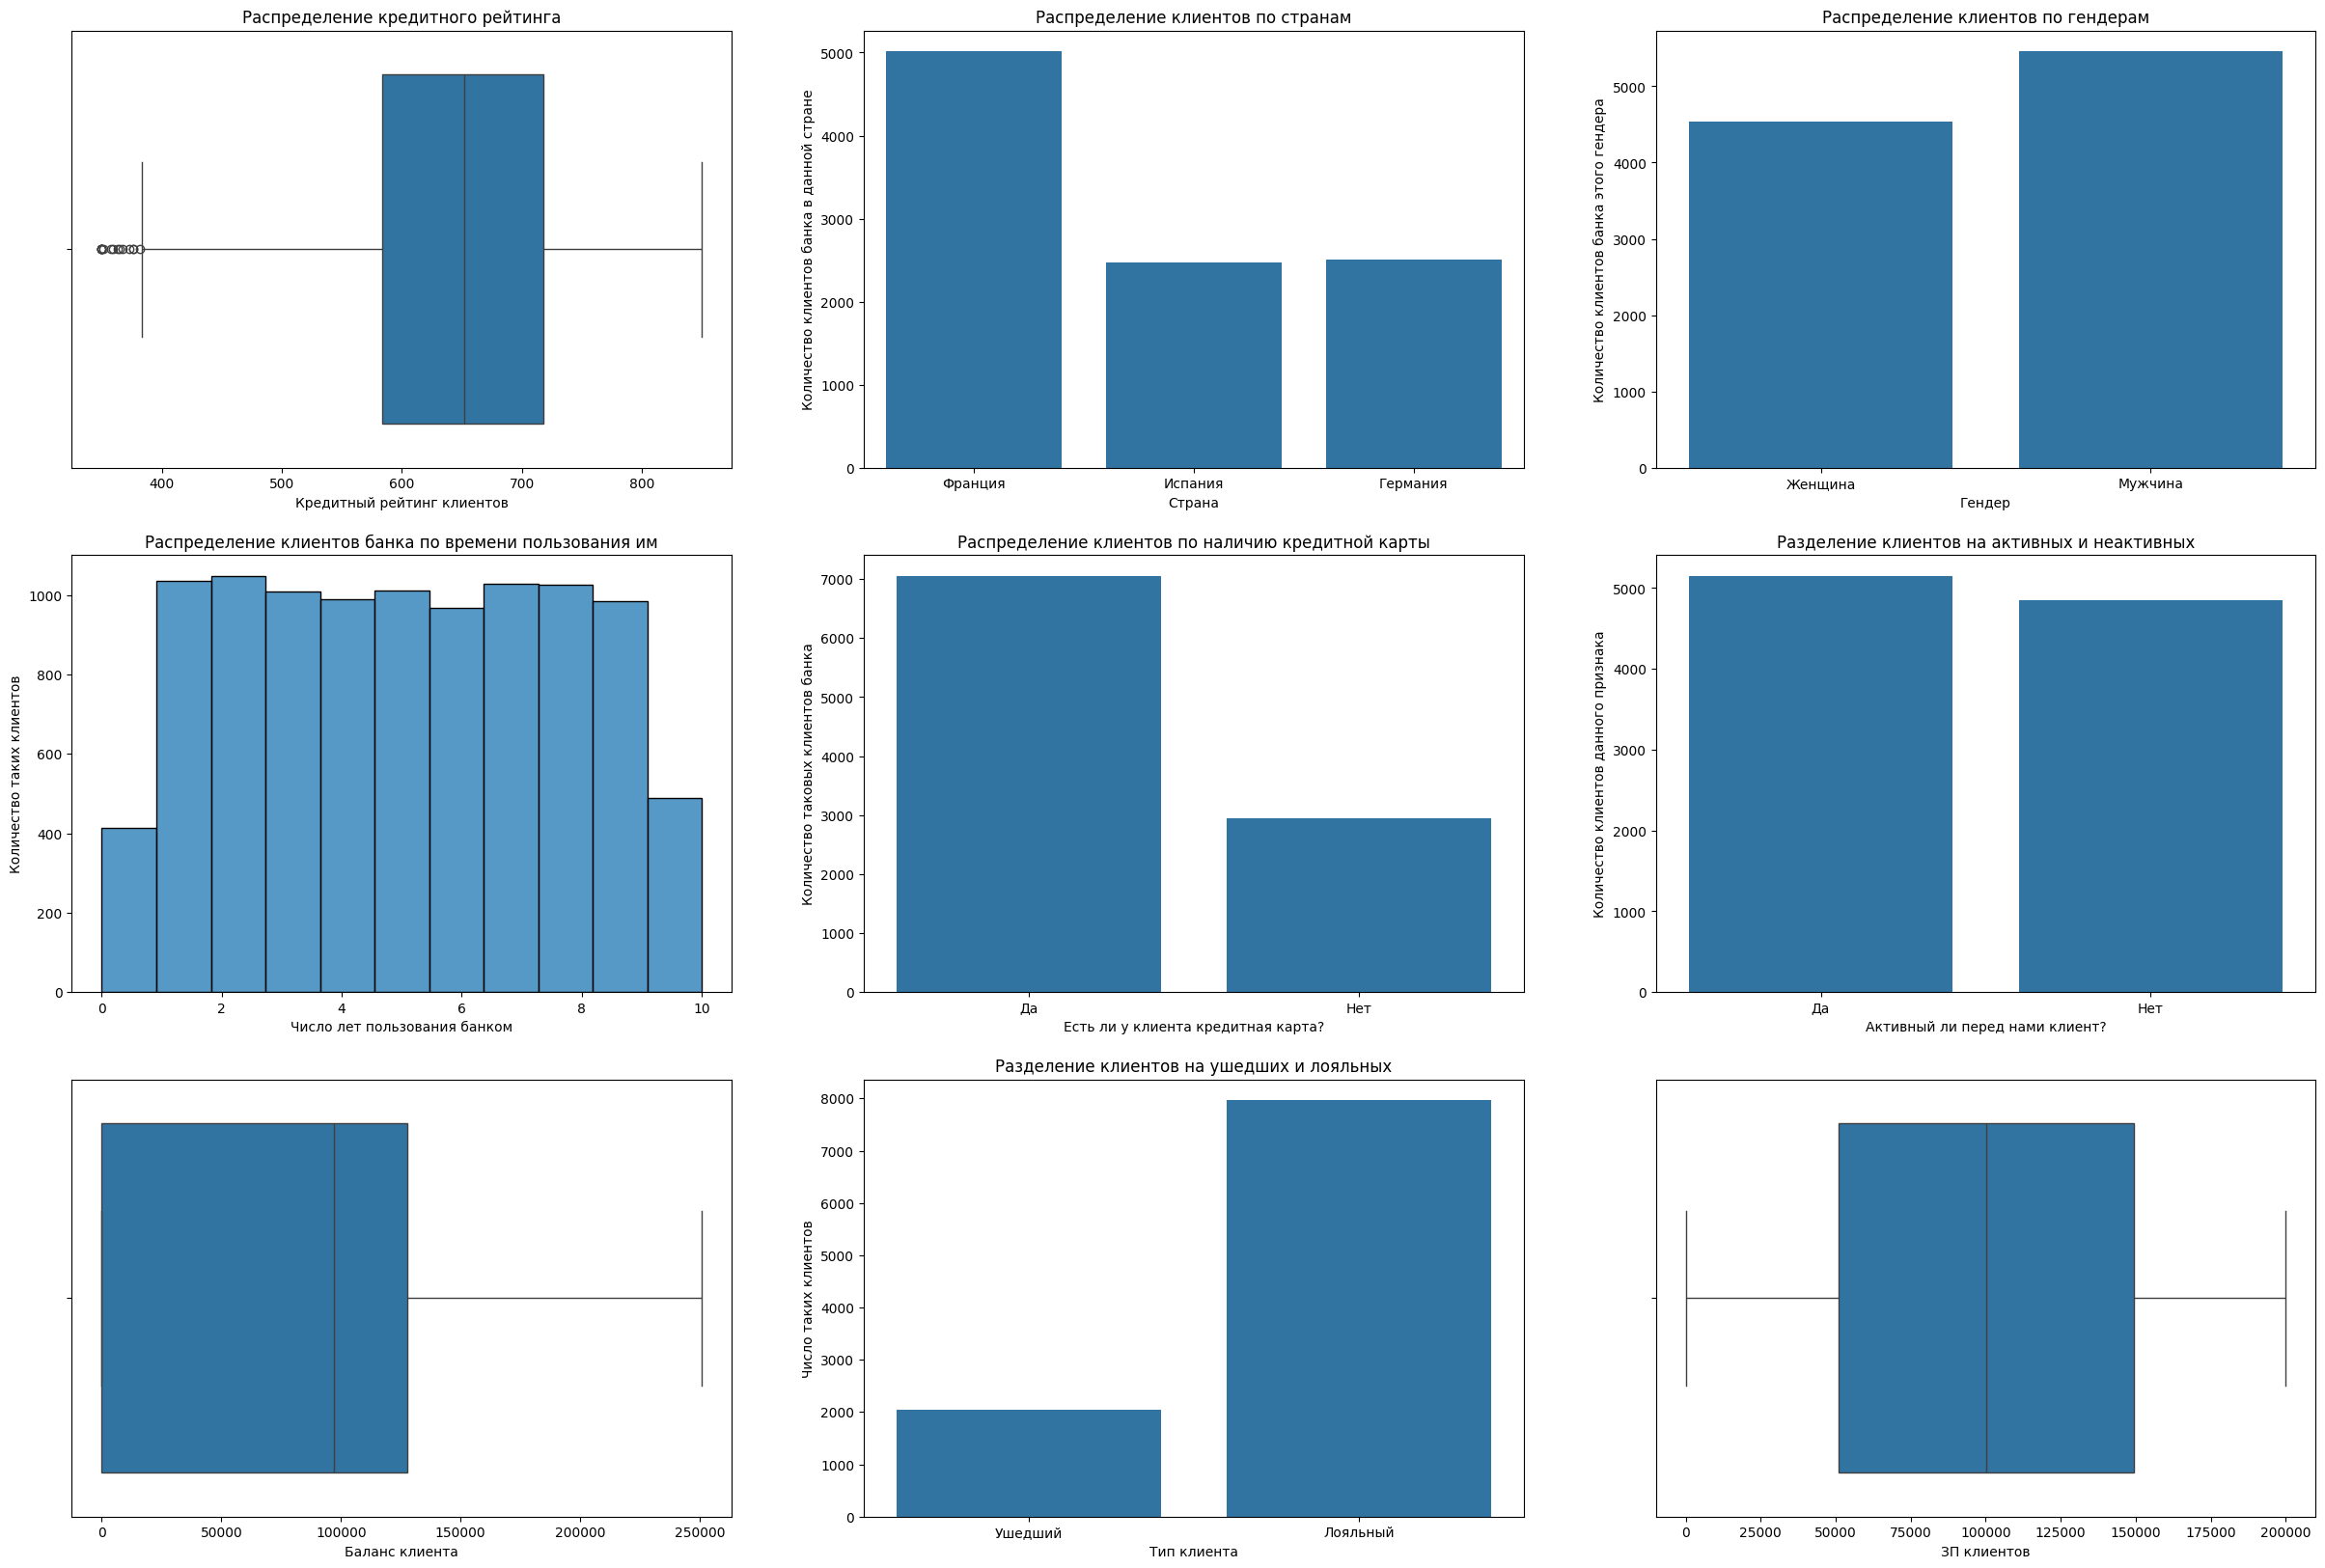

In [40]:
# Для понимания того какие данные нам предоставлены построим следующие диаграммы:
# Диаграмма распределения для кредитного рейтинга - признак CreditScore (boxplot)
# Диаграмма распределения клиентов по странам - признак Geography (countplot)
# Диаграмма расрпделения по гендерам - признак Gender (countplot)
# Диаграмма распределения клиентов банка по времени пользования им - признак Tenure (histplot)
# Диаграмма, показывающая соотношение людей с кредитными картами и без них - признак HasCrCard (countplot)
# Диаграмма, показывающая соотношение активных и пассивных пользователей банка - признак IsActiveMember (countplot)
# Диаграмма, показывающая распределение клиентов по балансу в банке - признак Balance (boxplot)
# Диаграмма распределения клиентов на ушедших и текущих - признак Exited (countplot)
# Диаграмма расределения предполагаемых заработных плат клиентов - признак EstimatedSalary (boxplot)

copy_data = churn_data.copy()
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))

creditscore = sns.boxplot(churn_data['CreditScore'], orient='h', ax=axes[0][0]);
creditscore.set_title('Распределение кредитного рейтинга');
creditscore.set_xlabel('Кредитный рейтинг клиентов');

copy_data['Geography'] = copy_data['Geography'].replace('Spain', 'Испания')
copy_data['Geography'] = copy_data['Geography'].replace('Germany', 'Германия')
copy_data['Geography'] = copy_data['Geography'].replace('France', 'Франция')
geography = sns.countplot(copy_data, x='Geography', ax=axes[0][1]);
geography.set_title('Распределение клиентов по странам');
geography.set_xlabel('Страна');
geography.set_ylabel('Количество клиентов банка в данной стране');

copy_data['Gender'] = copy_data['Gender'].replace('Male', 'Мужчина')
copy_data['Gender'] = copy_data['Gender'].replace('Female', 'Женщина')
gender = sns.countplot(copy_data, x='Gender', ax=axes[0][2]);
gender.set_title('Распределение клиентов по гендерам');
gender.set_xlabel('Гендер');
gender.set_ylabel('Количество клиентов банка этого гендера');

tenure = sns.histplot(churn_data, x='Tenure', bins=11, ax=axes[1][0]);
tenure.set_title('Распределение клиентов банка по времени пользования им');
tenure.set_xlabel('Число лет пользования банком');
tenure.set_ylabel('Количество таких клиентов');

copy_data['HasCrCard'] = copy_data['HasCrCard'].replace(1, 'Да')
copy_data['HasCrCard'] = copy_data['HasCrCard'].replace(0, 'Нет')
hascrcard = sns.countplot(copy_data, x='HasCrCard', ax=axes[1][1]);
hascrcard.set_title('Распределение клиентов по наличию кредитной карты');
hascrcard.set_xlabel('Есть ли у клиента кредитная карта?');
hascrcard.set_ylabel('Количество таковых клиентов банка');

copy_data['IsActiveMember'] = copy_data['IsActiveMember'].replace(1, 'Да')
copy_data['IsActiveMember'] = copy_data['IsActiveMember'].replace(0, 'Нет')
activemember = sns.countplot(copy_data, x='IsActiveMember', ax=axes[1][2]);
activemember.set_title('Разделение клиентов на активных и неактивных');
activemember.set_xlabel('Активный ли перед нами клиент?');
activemember.set_ylabel('Количество клиентов данного признака');

balance = sns.boxplot(churn_data['Balance'], orient='h', ax=axes[2][0]);
balance.set_label('Распределение баланса клиентов в банке');
balance.set_xlabel('Баланс клиента');

copy_data['Exited'] = copy_data['Exited'].replace(1, 'Ушедший')
copy_data['Exited'] = copy_data['Exited'].replace(0, 'Лояльный')
activemember = sns.countplot(copy_data, x='Exited', ax=axes[2][1]);
activemember.set_title('Разделение клиентов на ушедших и лояльных');
activemember.set_xlabel('Тип клиента');
activemember.set_ylabel('Число таких клиентов');

estimatedsalary = sns.boxplot(churn_data['EstimatedSalary'], orient='h', ax=axes[2][2]);
estimatedsalary.set_label('Распределение предполагаемых ЗП клиентов');
estimatedsalary.set_xlabel('ЗП клиентов');


В модуле по визуализации мы выяснили, что отток в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [41]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [42]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


Проверим, что в наших данных нет пропусков:

In [43]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Проверим, что в наших данных нет дубликатов:

In [44]:
churn_data[churn_data.duplicated()].sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

### Задание 5.1 (1 балл)

Давайте сделаем предобработку данных.

Для начала расширим датасет с помощью методов Feature Engineering. Создайте следующие признаки:
* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

Затем перекодируйте оставшиеся текстовые категориальные признаки в числовые бинарные столбцы.

Выведите основные статистические характеристики полученных признаков.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * приведён код для создания указанных в задании признаков;
    * приведён код для кодирования категориальных признаков в числовые бинарные столбцы;
    * приведён код для расчёта основных статистических характеристик полученных признаков.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [45]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance'] / churn_data['EstimatedSalary'] # отношение баланса на счетах к заработной плате клиента
churn_data['TenureByAge'] = churn_data['Tenure'] / churn_data['Age'] # отношение времени пользования услугами банка к возрасту клиента
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore'] / churn_data['Age'] # отношение кредитного рейтинга к возрасту клиента

dummies_data = pd.get_dummies(churn_data, drop_first=True) # перекодируем оставшиеся текстовые категориальные признаки в числовые бинарные
print('Размерность новых данных - {} строк и {} столбцов'.format(dummies_data.shape[0], dummies_data.shape[1]))
dummies_data.describe() # Основные статистические характеристики полученных признаков

Размерность новых данных - 2509 строк и 13 столбцов


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.00000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000
mean,651.453567,39.771622,5.009964,119730.116134,1.519729,0.71383,0.497409,101113.435102,0.324432,9.024870,0.134303,17.526487
std,98.168937,10.519143,2.935154,27022.006157,0.619420,0.45206,0.500093,58263.011501,0.468256,214.286020,0.087680,5.349558
min,350.000000,18.000000,0.000000,27288.430000,1.000000,0.00000,0.000000,11.580000,0.000000,0.192582,0.000000,6.112676
25%,584.000000,32.000000,2.000000,102800.720000,1.000000,0.00000,0.000000,51016.020000,0.000000,0.783284,0.060606,13.686275
50%,651.000000,38.000000,5.000000,119703.100000,1.000000,1.00000,0.000000,102397.220000,0.000000,1.197220,0.125000,16.857143
75%,722.000000,45.000000,8.000000,137560.380000,2.000000,1.00000,1.000000,151083.800000,1.000000,2.400083,0.200000,20.852941
max,850.000000,84.000000,10.000000,214346.960000,4.000000,1.00000,1.000000,199970.740000,1.000000,10614.655440,0.500000,46.388889


Разделим исходный набор данных на матрицу наблюдений `X` (фичи) и столбец ответов `y` (таргет).

In [46]:
X = dummies_data.drop("Exited", axis=1)
y = dummies_data["Exited"]

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, давайте посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [47]:
y.value_counts(normalize=True)

Exited
0    0.675568
1    0.324432
Name: proportion, dtype: float64

Очевидно, что классы не сбалансированы. Ушедших пользователей 32 %, в то время как лояльных — 68 %.


**К чему это может привести?**

При разделении набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может не научиться определять вероятность оттока и качество на тестовой выборке будет неудовлетворительным.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать отличное качество на тестовой выборке, но в реальных условиях она может оказаться бесполезной.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборке было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется **стратифицированным**.

Функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение. Для этого в ней предусмотрен параметр `stratify`, который нужно выставить в значение признака, который должен иметь одинаковые соотношения в тренировочной и тестовой выборке. У нас этот признак - это целевой признак y.

Выполним разбиение, установив значение параметра `random_state` на 0:


In [48]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    stratify=y,
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

In [49]:
print('Train :')
display(y_train.value_counts(normalize=True))
print('\n')
print('Test :', )
display(y_test.value_counts(normalize=True))

Train :


Exited
0    0.675704
1    0.324296
Name: proportion, dtype: float64



Test :


Exited
0    0.675159
1    0.324841
Name: proportion, dtype: float64

Соотношения одинаковы, а значит, мы можем перейти к следующему шагу.

### Задание 5.2 (1 балл)

Позаботьтесь о масштабировании признаков. Проведите нормализацию/стандартизацию матрицы наблюдений `X` с помощью `MinMaxScaler`/`RobustScaler` или `StandardScaler`. Выберите метод самостоятельно.

Обучите один из предложенных скейлеров на тренировочной выборке (вычислите параметры трансформации) и примените трансформацию данных к тренировочной и тестовой выборкам.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * приведён код для создания одного из вариантов скейлеров для масштабирования данных;
    * приведён код для расчёта параметров трансформации (обучение скейлера) на тренировочной выборке;
    * приведён код для трансформации тренировочных и тестовых данных (признаков) в соответствии с вычисленными параметрами.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [50]:
scaler = preprocessing.MinMaxScaler() # инициализируем скейлер
scaler.fit(X_train) # обучаем скейлер на тренировчной выборке
X_train_scaled = scaler.transform(X_train) # Трансформируем тренировочные признаки
X_test_scaled = scaler.transform(X_test) # Трансформируем тестовые признаки

Теперь переходим к моделированию.

### Задание 5.3 (1 балл)

Для начала давайте заранее определим метрику, на которую будем ориентироваться.

По условию задачи, наша модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, нам бы хотелось минимизировать как ложноположительные и ложноотрицательные срабатывания модели.

Какую метрику в данной задаче вы будете пытаться улучшить? Обоснуйте свой выбор.


__Выбранная метрика__
 $$accuracy$$


Выбор основан на том, что данная метрика представляет собой сумму истнинно положительных и истинно отрицательных результатов модели ко всем результатам.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * выбрана верная метрика;
    * приведено развернутое обоснование выбора метрики, и приведенные рассуждения являются верными;

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

__Выводы по заданию 5.3__

По условию задачи нам требуется выбрать такую метрику, которая будет минимизировать число ложноположительных и ложноотрицательных ответов. Для логистической регрессии у нас есть следующий набор метрик: __accuracy__, __precision__, __recall__, __f1__. Среди всех из них показывают отношение предсказаний только первые три. __recall__ помогает нам определить насколько хорошо модель находит элементы класса 1. __precision__ определяет то, как хорошо модель различает классы 1 и 0.

__accuracy__ - работает как отношение всех истинных ответов ко всем ответам, т.е. в нашем случае - отношение TP+TN к TP+FP+TN+FN. Соответственно чем выше будет метрика, тем лучше наша модель умеет предсказывать классы объекта.

### Задание 5.4 (2 балла)

Обучите модель логистической регрессии (`Logistic Regression`) на тренировочных данных. Позаботьтесь о воспроизводимости результата, установив конкретное значение параметра `random_state` (например, число 42).

Сделайте предсказание меток классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках.

Проинтерпретируйте полученные результаты, ответив на следующий вопрос:
* Как вы считаете, является ли ваша модель переобученной или недообученной?

> **Примечание.** Будем считать, что модель нас не удовлетворяет (считается недообученной), если значение целевой метрики на тестовой выборке меньше 0.5.

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * построена модель логистической регрессии, решающая поставленную задачу;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [51]:
log_reg = linear_model.LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_test = log_reg.predict(X_test_scaled)
y_pred_train = log_reg.predict(X_train_scaled)

print('Метрика accuracy на данных train равна {:.2f}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Метрика accuracy на данных test равна {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test)))

log_reg_l1 = linear_model.LogisticRegression(random_state=42, penalty='l1', solver='liblinear')
# solver='liblinear' (покоординатный спуск) - результат на train - 0.73, test - 0.72
log_reg_l1.fit(X_train_scaled, y_train)
y_pred_test_l1 = log_reg_l1.predict(X_test_scaled)
y_pred_train_l1 = log_reg_l1.predict(X_train_scaled)

print('Метрика accuracy на данных train с l1-регуляризацией равна {:.2f}'.format(metrics.accuracy_score(y_train, y_pred_train_l1)))
print('Метрика accuracy на данных test с l1-регуляризацией равна {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test_l1)))

Метрика accuracy на данных train равна 0.73
Метрика accuracy на данных test равна 0.72
Метрика accuracy на данных train с l1-регуляризацией равна 0.73
Метрика accuracy на данных test с l1-регуляризацией равна 0.72


__Вывод по заданию 5.4__

Результат метрики accuracy на тренировчной выборке, не зависимо от регуляризации - 73%, для тестовой выборки значение равняется 72%. Показатель в 72% превышает порог необученной модели в 50%, также можно сказать, что модель не является переообученной за счет того, что у нас присутствует регуляризация, а также за счет того, что метрика не поднимается до 90%, что служило бы поводом счесть модель переобученной.

### Задание 5.5 (2 балла)

Сгенерируйте полиномиальные признаки третьей степени для тренировочной и тестовой выборок. Используйте класс `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` выставите в значение `False`.

> **Примечание.** Обратите внимание, что для генерации полиномов необходимо использовать масштабированные данные.

Обучите модель логистической регрессии на полиномиальных признаках (`Logistic Regression`). Позаботьтесь о воспроизводимости результат, установив конкретное значение параметра `random_state` (например, число 42).

Предскажите метки классов для тренировочной и тестовой выборок.

Рассчитайте значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках.

Сравните результат с полученным ранее. Удалось ли вам улучшить качество вашей модели?

**Дополнительное задание:**

Попробуйте поуправлять следующими параметрами модели:
* `penalty` — тип используемой регуляризации ('l1' — $L_1$-регуляризация, 'l2' — $L_2$-регуляризация);
* `C` — коэффициент, обратный коэффициенту регуляризации (по умолчанию он равен 1).

Понаблюдайте, как ведут себя метрики в зависимости от типа регуляризации и увеличения/уменьшения значения парамера `C`.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * сгенерированы полиномиальные признаки третьей степени;
    * построена модель логистической регрессии, решающая поставленную задачу на основе сгенерированных признаков;
    * с помощью полученной модели сформированы предсказания на тренировочной и тестовой выборках;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [52]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)

log_reg = linear_model.LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled_poly, y_train)
y_pred_test_poly = log_reg.predict(X_test_scaled_poly)
y_pred_train_poly = log_reg.predict(X_train_scaled_poly)

print('Метрика accuracy на полиномиальных признаках 3-й степени датасета train равна {:.2f}'.format(metrics.accuracy_score(y_train, y_pred_train_poly)))
print('Метрика accuracy на полиномиальных признаках 3-й степени датасета test равна {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test_poly)))

Метрика accuracy на полиномиальных признаках 3-й степени датасета train равна 0.81
Метрика accuracy на полиномиальных признаках 3-й степени датасета test равна 0.79


__Вывод по заданию 5.5__

После проведения предсказаний на масштабированных данных, на полиномиальных признаках 3-ьей степени, мы получили результат метрики в 79%. Следовательно можно утверждать, что качество нашей модели возросло на 7% в абсолютном значении, а также на 10% относительно предыдущего предсказания (7/70*100 = 10)

### Задание 5.6. (2 балла)


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. В качестве модели используйте логистическую регрессию, обученную на полиномиальных признаках.

В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните результат с полученными ранее.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * приведён код для построения графика зависимости значения выбранной метрики от порога вероятности;
    * найден оптимальный порог вероятности, на котором достигается наибольшее значение выбранной метрики на тестовой выборке;
    * на основе найденного порога вероятности построено предсказание модели для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не приведён вывод по полученным результатам или вывод является неверным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [53]:
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(log_reg.predict_proba(X_test_scaled_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = metrics.accuracy_score(y_test, y_test_pred_poly)                       # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)

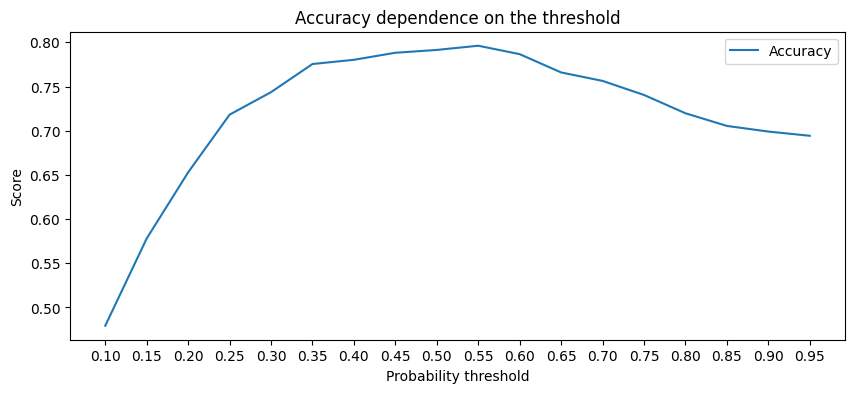

In [54]:
#Визуализируем метрику при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, scores, label='Accuracy')

#Даём графику название и подписываем оси
ax.set_title('Accuracy dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds)
#Отображаем легенду
ax.legend();

In [55]:
threshold_opt = 0.55

y_train_proba_pred = pd.Series(log_reg.predict_proba(X_train_scaled_poly)[:, 1])

y_pred_test_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
y_pred_train_opt = y_train_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

#Считаем метрики
print('Итоговый результат метрики accuracy для test - {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test_opt)))
print('Итоговый результат метрики accuracy для train - {:.2f}'.format(metrics.accuracy_score(y_train, y_pred_train_opt)))

Итоговый результат метрики accuracy для test - 0.80
Итоговый результат метрики accuracy для train - 0.80


__Вывод по заданию 5.6__

Итоговый порог вероятности, при котором достигается наилучший показатель accuracy равен 0.55. Итоговое значение accuracy для test и train достигается при данном пороге вероятности, а итоговая метрика для обоих типов данных равняется примерно 80% после округления до двух знаков. Можно сделать вывод о том, что порог вероятности помог улучшить качество предсказаний на 1%, а также усреднить значение тестовой и тренировочной выборок также на 1%

## Практика: деревья решений и случайный лес

Мы продолжаем решать задачу прогнозирования оттока клиентов банка.

Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

> Теперь попробуем решить задачу с помощью деревьев решений и лесов.


> **Примечание №1.** Для выполнения дальнейших заданий необходимо совершить уже знакомые шаги предобработки с данными об оттоке клиентов банка, а именно:
* выделить данные, относящиеся к отделениям банка в Германии;
* избавиться от заведомо неинформативных признаков;
* расширить датасет путём добавления новых признаков;
* разделить выборку на тренировочную и тестовую со стратификацией.

> **Примечание №2.** Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.
Также деревья решений не чувствительны к масштабу признаков. Масштабирование исходных данных не играет роли при построении деревьев решения.
Поэтому для решения задачи используйте обучающую (`X_train`, `y_train`) и тестовую (`X_test`, `y_test`) выборки без полиномиальных столбцов.


In [56]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    stratify=y,
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


Импортируем необходимые для выполнения практики модули:

In [57]:
from sklearn import tree
from sklearn import ensemble

Приступим! Выполните задания 8.1–8.4.

### Задание 8.1. (2 балла)

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с неограниченной максимальной глубиной дерева. В качестве критерия информативности используйте энтропию Шеннона, остальные параметры оставьте по умолчанию.

Также позаботьтесь о воспроизводимости результатов, установив конкретное  значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сделайте вывод, ответив на вопрос:
* Как вы считаете, является полученная модель переобученной или недообученной? Попробуйте дать обоснование, почему так происходит.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**):
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос, а также обоснование полученного результата.

- Задание выполнено верно, но не приведено обоснование полученного результата или обоснование является некорректным (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [58]:
# создаем модель из модуля sklearn.tree
dec_tree_model = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

# Обучаем модель
dec_tree_model.fit(X_train, y_train)

# Предсказываем на тренировочном датасете
y_pred_train = dec_tree_model.predict(X_train)
# Предсказываем на тестовом датасете
y_pred_test = dec_tree_model.predict(X_test)

# Для корректности сравнения используем ту же метрику, что использовали для модели логистической регрессии
print('Результат метрики accuracy для test выборки DecisionTreeClassifier - {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test)))
print('Результат метрики accuracy для train выборки DecisionTreeClassifier - {:.2f}'.format(metrics.accuracy_score(y_train, y_pred_train)))

print(f'\nМаксимальная глубина дерева - {dec_tree_model.get_depth()}\n')

Результат метрики accuracy для test выборки DecisionTreeClassifier - 0.70
Результат метрики accuracy для train выборки DecisionTreeClassifier - 1.00

Максимальная глубина дерева - 21



__Вывод по заданию 8.1__

Как видно из полученной метрики accuracy результат предсказания на **тестовой выборке дает точность в 70% ответов**, а на **тренировчной в 100%**. Судя по такой оценке можно смело утверждать, что модель решающего дерева перееобучилась, из чего следует, что ее практические применение будет невозможно. Дополнительный вывод максимальной глубины дерева показал, что **дерево имеет глубину равную 21**.

Следовательно для достижения ответа задается 21 вопрос, что затрачивает ресурсы, а также приводит к переобучению. Для решения проблемы перееобучения **следует ограничить максимальную глубину дерева**, что приведет к понижению метрики с попутным улучшением качества и возможностью использовать модель в практических задачах.


### Задание 8.2. (1 балл)

Давайте «подстрижём» наше дерево.

Обучите на тренировочной выборке дерево решений из библиотеки `sklearn` (`DecisionTreeClassifier`) с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните результат с полученными ранее. Сделайте вывод.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балла**):
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [65]:
# создаем модель из модуля sklearn.tree со специальными параметрами
dec_tree_model2 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8,
    min_samples_leaf=10,
    random_state=42
)

# Обучаем модель
dec_tree_model2.fit(X_train, y_train)
# Предсказываем на тренировочном датасете
y_pred_train2 = dec_tree_model2.predict(X_train)
# Предсказываем на тестовом датасете
y_pred_test2 = dec_tree_model2.predict(X_test)

print('Результат метрики accuracy для test выборки DecisionTreeClassifier с ограниченной глубиной дерева - {:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test2)))
print('Результат метрики accuracy для train выборки DecisionTreeClassifier с ограниченной глубиной дерева - {:.2f}'.format(metrics.accuracy_score(y_train, y_pred_train2)))

Результат метрики accuracy для test выборки DecisionTreeClassifier с ограниченной глубиной дерева - 0.79
Результат метрики accuracy для train выборки DecisionTreeClassifier с ограниченной глубиной дерева - 0.83


__Выводы по заданию 8.2__

После введения ограничений на максимальную глубину дерева, а также минимальное число объектов в листе, результат метрик для тренировочных и тестовых данных изменился. Ожидаемо для **тренировочной выборки результат уменьшился с 100% верных ответов до 83%**, для **тестовой выборки результат метрики вырос с 70% до 79%**.

Как итог можно констатировать, что **качество модели улучшилось**, а значит становится возможным ее **применение для решения реальных задач** на схожих данных.

### Задание 8.3. (1 балл)

Давайте воспользуемся случайным лесом.

Постройте случайный лес (`RandomForestClassifier`) из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона, минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

Также позаботьтесь о воспроизводимости результатов, установив конкретное значение значение `random_state` (например, число 42).

Сделайте предсказания для тренировочной и тестовой выборок. Рассчитайте значение целевой метрики на каждой из выборок.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * построена модель дерева решений с заданными в условии задачи параметрами;
    * с помощью полученной модели сформированы предсказания для тренировочной и тестовой выборок;
    * приведён расчёт выбранной метрики на тренировочных и тестовых данных (метрика должна быть выбрана корректно);
    * приведён небольшой вывод по полученным результатам, в котором содержится корректный ответ на поставленный в задании вопрос.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [88]:
# Создаем модель
ensemble1 = ensemble.RandomForestClassifier(
    n_estimators=500,
    criterion='entropy',
    max_depth=8,
    min_samples_leaf=10,
    random_state=42
)

# Обучаем ансамбль
ensemble1.fit(X_train, y_train)
# Предсказываем для датасета train
y_train_ensemble1_pred = ensemble1.predict(X_train)
# Предсказываем для датасета test
y_test_ensemble1_pred = ensemble1.predict(X_test)

# Предсказываем метрику accuracy для обеих выборок
print('Результат метрики accuracy для test модели RandomForestClassifier - {:.2f}'.format(metrics.accuracy_score(y_test, y_test_ensemble1_pred)))
print('Результат метрики accuracy для train модели RandomForestClassifier - {:.2f}'.format(metrics.accuracy_score(y_train, y_train_ensemble1_pred)))

Результат метрики accuracy для test модели RandomForestClassifier - 0.79
Результат метрики accuracy для train модели RandomForestClassifier - 0.85


__Вывод по заданию 8.3__

После получения предсказания, основанного на модели случайного леса, **метрика не получила кардинального улучшения для данных train**, а на данных **test изменения не произошло вообще**. Следовательно стоит подобрать другие параметры для нашей модели с целью получения более качественного предсказания.

### Задание 8.4. (2 балла)

Мы на финишной прямой.


Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. **Используйте ту модель (из рассмотренных ранее), которая показала наилучшее качество на тестовой выборке.**


В качестве порога вероятности используйте значения из следующего диапазона:

`thresholds = np.arange(0.1, 1, 0.05)`

Напомним алгоритм, как определить оптимальный порог вероятности:
* Предсказать вероятности оттока для каждого клиента из тестовой выборки.
* В цикле перебрать значения порогов вероятности threshold:
    * Сделать предсказание класса по принципу: если вероятность > threshold, то отнести объект к классу 1, в противном случае — к классу 0.
    * Рассчитать метрику и занести её в заранее созданный список.

Для реализации алгоритма подбора вы можете воспользоваться шаблоном кода, приведённым ниже:

```python
# Делаем предсказание вероятности оттока для каждого клиента из тестовой выборки
y_test_proba_pred = pd.Series(model.predict_proba(X_test_poly)[:, 1])
# Инициализируем список, куда будем сохранять метрики.
scores = []
# Задаём значения порогов вероятности
thresholds = np.arange(0.1, 1, 0.05)
# В цикле перебираем значения порогов вероятности
for threshold in thresholds:
    # Делаем предсказание
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    # Рассчитываем метрику
    score = # код для вычисления метрики
    # Добавляем результат в список
    scores.append(score)
```

Постройте график зависимости целевой метрики от порога вероятности. На основе построенного графика определите порог вероятности, которому соответствует наибольшее значение целевой метрики на тестовой выборке.

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Рассчитайте значение целевой метрики на тестовой выборке и сравните полученный результат с полученными ранее.

Напишите небольшой вывод о проделанной работе, указав в нём, какая из рассмотренных нами моделей показала наилучший результат.

> **Примечание.** Помните о том, что в реальных задачах (а мы решали задачу на реальных данных) мы практически никогда не сможем получить значения метрик, близкие к 1. Если в задаче прогнозирования оттока ваша метрика превышает хотя бы значения 0.6-0.7, вашу модель уже можно считать хорошей и можно говорить о том, что она успешно справляется с задачей.

Итоговая метрика accuracy на модели случайного леса с подобраным порогом вероятности составляет 0.799


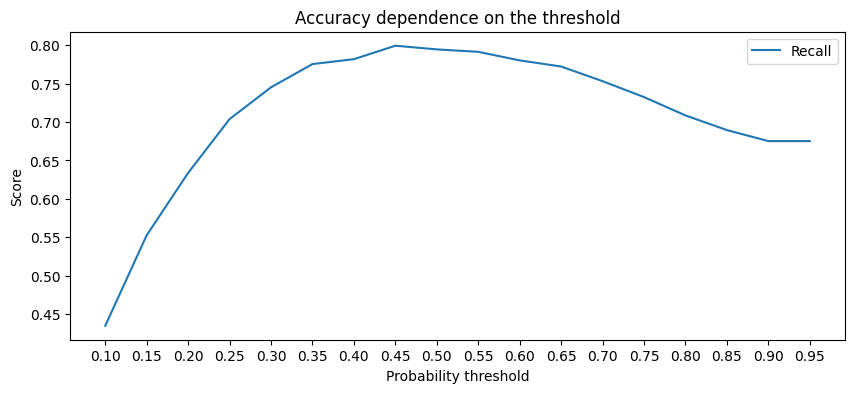

In [70]:
y_test_proba_pred_ensemble = pd.Series(ensemble1.predict_proba(X_test)[:, 1])

accuracy_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred_ensemble.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрику и добавляем их в списки
    accuracy_scores.append(metrics.accuracy_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4))
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, accuracy_scores, label='Recall')

#Даем графику название и подписи осям
ax.set_title('Accuracy dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds)
ax.legend();

threshold_opt = 0.45
y_test_pred_opt_ensemble = y_test_proba_pred_ensemble.apply(lambda x: 1 if x > threshold_opt else 0)

print('Итоговая метрика accuracy на модели случайного леса с подобраным порогом вероятности составляет {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred_opt_ensemble)))

__Вывод по заданию 8.4__

Для работы была взята модель, **основанная на случайном лесе**, полученная в задании 8.3, т.к. ее метрики имели наивысший результат среди прочих моделей (задания 8.1-8.3).

После проверки порога вероятности на метрике accuracy выяснилось, что оптимальный **порог вероятности имеет значение 0.45**. Изменение итогового предсказания в соответствии с порогом вероятности позволило **получить наивысший результат метрики accuracy на тестовых данных, равный 0.799**.

### Задание 8.5. (1 балл)

Наконец, финальная задача.

У нашего банка есть некоторый клиент, назовём его Василием. В базе данных банка хранятся следующие данные о Василии:

```python
{
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}
```

С помощью наилучшей модели спрогнозируйте вероятность того, что Василий откажется от услуг банка.

> **Примечание.** Учтите, что для предсказания необходимо преобразовать данные к тому формату, на котором обучалась модель, то есть:
* добавить признаки дополнительные признаки;
* произвести кодирование категориальных признаков;
* произвести масштабирование признаков (если ваша модель обучалась на масштабированных данных) с помощью того же скейлера, который вы использовали при обучении модели;
* сгенерировать полиномиальные признаки.

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**):
    * сформирован DataFrame на основе предоставленного словаря;
    * произведены преобразования данных, необходимые для работы модели;
    * предсказана вероятность оттока клиента (вероятность принадлежности к классу 1).

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [96]:
vasily_data = {
    'CreditScore': [601.0],
    'Gender': ['Male'],
    'Age': [42.0],
    'Tenure': [1.0],
    'Balance': [98495.72],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [0.0],
    'EstimatedSalary': [40014.76]
}

vas_df = pd.DataFrame(vasily_data)

vas_df['BalanceSalaryRatio'] = vas_df['Balance'] / vas_df['EstimatedSalary'] # отношение баланса на счетах к заработной плате клиента
vas_df['TenureByAge'] = vas_df['Tenure'] / vas_df['Age'] # отношение времени пользования услугами банка к возрасту клиента
vas_df['CreditScoreGivenAge'] = vas_df['CreditScore'] / vas_df['Age'] # отношение кредитного рейтинга к возрасту клиента
vas_df['Gender_Male'] = vas_df['Gender'].apply(lambda x: True if x == 'Male' else False)

list_of_drop_cols = [] # Список признаков, которых нет в тестовых данных

for col in vas_df.columns:
  if col not in X_test.columns:
    list_of_drop_cols.append(col) # Добавляем признак к удалению для того, чтобы привести данные к верному формату

vas_df = vas_df.drop(columns=list_of_drop_cols, axis=1) # Очищаем данные

vas_pred = ensemble1.predict(vas_df) # Предсказываем вероятность оттока клиента
print('Модель относит нашего клиента к классу {}, а вероятность перехода клиента составляет {}'.format(*vas_pred, *ensemble1.predict_proba(vas_df)[:, 1]))

Модель относит нашего клиента к классу 1, а вероятность перехода клиента составляет 0.6223883375663578
